# Question 1

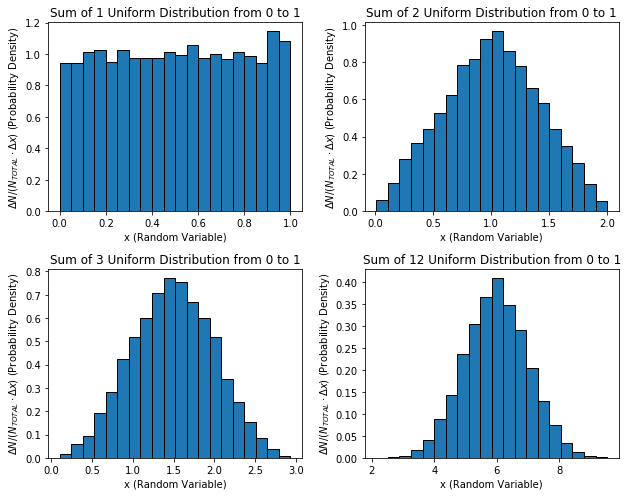

In [1]:
%matplotlib inline
import numpy as np
import numpy as npy
from prettytable import PrettyTable
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

n = 10000
bins = 20

def uniform_sum(low,upper,sumAmount,n):
    dist = []
    for x in range(n):
        total = 0
        for val in npy.random.uniform(low,upper,sumAmount):
            total += val
        dist.append(total)
    return dist

# Figure
f = plt.figure(figsize=(9,7)) # make a bigger 12cm x 7cm figure

def plot_uniform_sum(graphPos, bins, lowerBound, upperBound, sumAmount):
    data = uniform_sum(lowerBound,upperBound,sumAmount,n)
    p = plt.subplot(2,2,graphPos)
    p.hist(data, edgecolor='black', linewidth=1, density=True, bins=bins)
    p.set_title("Sum of "+str(sumAmount)+" Uniform Distribution from 0 to 1")
    p.set_xlabel('x (Random Variable)')
    p.set_ylabel(r'$ \Delta N /  (N_{TOTAL} \cdot \Delta x)$ (Probability Density)')
    
plot_uniform_sum(1,bins,0,1,1)
plot_uniform_sum(2,bins,0,1,2)
plot_uniform_sum(3,bins,0,1,3)
plot_uniform_sum(4,bins,0,1,12)

plt.tight_layout()
plt.show()

In [77]:
# Returns the mean and standard deviation of a summed uniform distribution.
def uniform_sum_meanSD(lowerBound, upperBound, sumAmount):
    mean = 0
    variance = 0;
    for x in range(sumAmount):
        mean += (upperBound-lowerBound)/2
        variance += ((upperBound-lowerBound)**2)/12
    return mean,variance**0.5

# Calculates the mean and standard deviation of a dataset.
def meanSD(x):
    #Calculate Mean of array
    mean = sum(x)/len(x)
    #Calculate SD of array
    sd = 0.
    for v in x:
        sd += (v-mean)**2   
    sd = (sd/len(x))**0.5
    return mean, sd

# Prints a table for the Experimental and Theoretical Mean and Standard Deviation for Uniform Distribution Sums.
def printDistributionValues(lowerBound, upperBound, sumAmount):
    
    print("Mean and Standard Deviation for the sum of {0} Uniform Distributions between {1} & {2}".format(sumAmount,lowerBound,upperBound))
    experimental = meanSD(uniform_sum(lowerBound,upperBound,sumAmount,n))   # Mean and SD for the data set
    theoretical  = uniform_sum_meanSD(lowerBound,upperBound,sumAmount)      # Prints Theoretical Mean and SD 
    
    # Prints Table of results
    table = PrettyTable(['','Mean','Standard Deviation'])
    table.add_row(["Experimental","{0:10.4f}".format(experimental[0]),"{0:10.4f}".format(experimental[1])])
    table.add_row(["Theoretical","{0:10.4f}".format(theoretical[0]),"{0:10.4f}".format(theoretical[1])])
    print(table)
    print("")

printDistributionValues(0,1,1)
printDistributionValues(0,1,2)
printDistributionValues(0,1,3)
printDistributionValues(0,1,12)

Mean and Standard Deviation for the sum of 1 Uniform Distributions between 0 & 1
+--------------+------------+--------------------+
|              |    Mean    | Standard Deviation |
+--------------+------------+--------------------+
| Experimental |     0.5026 |         0.2892     |
| Theoretical  |     0.5000 |         0.2887     |
+--------------+------------+--------------------+

Mean and Standard Deviation for the sum of 2 Uniform Distributions between 0 & 1
+--------------+------------+--------------------+
|              |    Mean    | Standard Deviation |
+--------------+------------+--------------------+
| Experimental |     0.9979 |         0.4101     |
| Theoretical  |     1.0000 |         0.4082     |
+--------------+------------+--------------------+

Mean and Standard Deviation for the sum of 3 Uniform Distributions between 0 & 1
+--------------+------------+--------------------+
|              |    Mean    | Standard Deviation |
+--------------+------------+------------

These four histograms show the Irwin-Hall distribution. The first is uniform without any summations, the second is triangular with 2 summations and the third and fourth tend towards a gaussian distribution as the summation tends to infinity.

The theoretical values are calculated alongside experimental values which are calculated from the produced dataset, and are consistent with each other showing the Central Limit Theorem works for calculating the mean and variance.

# Question 2

## Linear Fit

+-------------+------------+------------+
|  Parameter  |   Fitted   |    True    |
+-------------+------------+------------+
|      m      |     2.2469 |     2.0000 |
|      c      |    -0.3473 |     1.0000 |
| reduced χ^2 |     0.9590 |     -      |
+-------------+------------+------------+


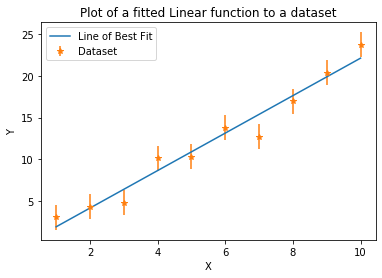

In [16]:
# generate data
m=2.0 # true gradient
c=1.0 # true intercept
n=10 # number of points

# define a model for fitting and plotting below
def linear_model(x,m,c):
    """Linear function, 1st arg = array of x, 2nd gradient, 3rd intercept"""
    return m*x + c

# make data to fit
x = np.linspace(1,10,n) # n points equally spaced from 0 to 10
y_true = linear_model(x,m,c) # true y values
y_err = np.ones(n)*1.5 # constant errors on each point
y = y_true + y_err*norm.rvs(size=n) # add a random error to each point: this is the "measured" data

m_fit = 0. # first guess of m
c_fit = 0. # first guess of c

# use curve_fit to fit the data to the function provided
# and optmise to the closest set of parameters
# input is the function to be fitted, x,y,sigma for data and the first guess values of the parameters
# output is: popt = best solution, pcov = covariance matrix
popt, pcov = curve_fit(linear_model,x,y,sigma=y_err,p0=[m_fit,c_fit]) 
(m_fit,c_fit) = popt

# cacluate the chi2 = sum ((y_data - y_fit)/y_err)**2
chi2 = np.sum( ((y-linear_model(x,m_fit,c_fit))/y_err)**2 )
rchi2 = chi2/(n-2)

table = PrettyTable(['Parameter','Fitted','True'])
table.add_row(["m","{0:10.4f}".format(m_fit),"{0:10.4f}".format(m)])
table.add_row(["c","{0:10.4f}".format(c_fit),"{0:10.4f}".format(c)])
table.add_row(["reduced \u03C7^2","{0:10.4f}".format(rchi2),"-"])
print(table)

# plot data and fitted line
xplot = np.linspace(1,10,100) # 100 points equally spaced from 0 to 10
yplot = linear_model(xplot,m_fit,c_fit)
plt.plot(xplot,yplot, label="Line of Best Fit")
plt.errorbar(x,y,y_err,fmt='*', label="Dataset")
plt.xlabel("X"); plt.ylabel("Y")
plt.title("Plot of a fitted Linear function to a dataset")
plt.legend()
plt.show()

## Quadratic Fit 

+-------------+------------+------------+
|  Parameter  |   Fitted   |    True    |
+-------------+------------+------------+
|      a      |     5.0076 |     5.0000 |
|      b      |     1.8799 |     2.0000 |
|      c      |   -10.3427 |   -10.0000 |
| reduced χ^2 |     1.0934 |     -      |
+-------------+------------+------------+


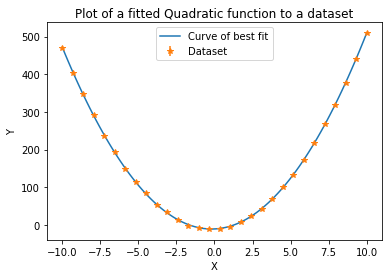

In [15]:
# generate data
a=5 # x^2 parameter
b=2 # x parameter
c=-10 # true intercept
n=30 # number of points

# define a model for fitting and plotting below
def quadratic_model(x,a,b,c):
    """Linear function, 1st arg = array of x, 2nd gradient, 3rd intercept"""
    return a*x**2+b*x+c

# make data to fit
x = np.linspace(-10,10,n) # n points equally spaced from 0 to 10
y_true = quadratic_model(x,a,b,c) # true y values
y_err = np.ones(n)*1.5 # constant errors on each point
y = y_true + y_err*norm.rvs(size=n) # add a random error to each point: this is the "measured" data

a_fit = 0. # first guess of m
b_fit = 0. # first guess of m
c_fit = 0. # first guess of c

# use curve_fit to fit the data to the function provided
# and optmise to the closest set of parameters
# input is the function to be fitted, x,y,sigma for data and the first guess values of the parameters
# output is: popt = best solution, pcov = covariance matrix
popt, pcov = curve_fit(quadratic_model,x,y,sigma=y_err,p0=[a_fit,b_fit,c_fit]) 
(a_fit,b_fit,c_fit) = popt

# cacluate the chi2 = sum ((y_data - y_fit)/y_err)**2
chi2 = np.sum( ((y-quadratic_model(x,a_fit,b_fit,c_fit))/y_err)**2 )
rchi2 = chi2/(n-2)

table = PrettyTable(['Parameter','Fitted','True'])
table.add_row(["a","{0:10.4f}".format(a_fit),"{0:10.4f}".format(a)])
table.add_row(["b","{0:10.4f}".format(b_fit),"{0:10.4f}".format(b)])
table.add_row(["c","{0:10.4f}".format(c_fit),"{0:10.4f}".format(c)])
table.add_row(["reduced \u03C7^2","{0:10.4f}".format(rchi2),"-"])
print(table)

# plot data and fitted line
xplot = np.linspace(-10,10,100) # 100 points equally spaced from 0 to 10
yplot = quadratic_model(xplot,a_fit,b_fit,c_fit)
plt.plot(xplot,yplot, label="Curve of best fit")
plt.errorbar(x,y,y_err,fmt='*', label="Dataset")
plt.xlabel("X"); plt.ylabel("Y")
plt.title("Plot of a fitted Quadratic function to a dataset")
plt.legend()
plt.show()